# Description : This program classifies a person having a cardiovascular disease or not.

#### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

#### Loading dataset

In [4]:
df = pd.read_csv('cardio_train.csv')

#### After cleaning the dataset, the following program will show the first severals rows from our loaded dataset (first 10 rows)

In [5]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


#### Taking out the shape out of our dataset

In [6]:
df.shape

(70000, 13)

-We have 70,000 individuals or row in our dataset and 13 features 

#### Checking empty values/null values from our dataset

In [7]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
df.isnull().values.any()

False

## Basic statistics of our dataset

#### The following program will show us the basic statistics like mean value, standard deviation, minimum and maximum value of each feature

In [9]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19470.431171,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2473.358967,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10964.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17665.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,47403.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


#### Now, Counting on the following dataset of people having cardio vascular disease and not having cardio disease

In [10]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

So, there are 35,021 individuals having no cardio vascular disease and 34,979 patients having a cardio vascular disease

#### Visualizing the above number of count

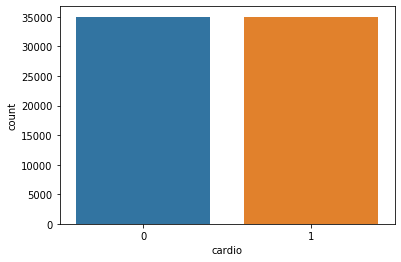

In [11]:
sns.countplot(df['cardio'])

So, the dataset we are using is almost balanced with number of patients having a cardio disease and not having it


#### Making a new colomn "age" from our dataset that would help us to see people having cardio disease of different ages 

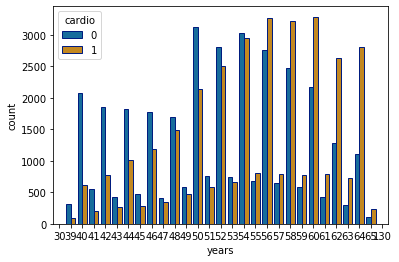

In [12]:
df['years']=(df['age'] / 365).round(0)
df['years']=pd.to_numeric(df['years'], downcast='integer')

#visualizing the data
sns.countplot(x='years',hue='cardio',data=df,palette='colorblind' , edgecolor=sns.color_palette('dark',n_colors=1))

Here, 0 means people not having cardio disease
and 1 means people having a cardio disease

####  The following program will show us the correlations of the colomns of our cardio disease dataset

In [13]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
id,1.000000,0.002970,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.002566
age,0.002970,1.000000,-0.022776,-0.080905,0.053367,0.020649,0.017526,0.153701,0.098209,-0.047712,-0.029800,-0.009590,0.236939,0.999094
gender,0.003502,-0.022776,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.022982
height,-0.003038,-0.080905,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.080845
weight,-0.001830,0.053367,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053343
ap_hi,0.003356,0.020649,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020678
ap_lo,-0.002529,0.017526,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017632
cholesterol,0.006106,0.153701,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.153661
gluc,0.002467,0.098209,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098101
smoke,-0.003699,-0.047712,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047962


##### Visualizing the above data 

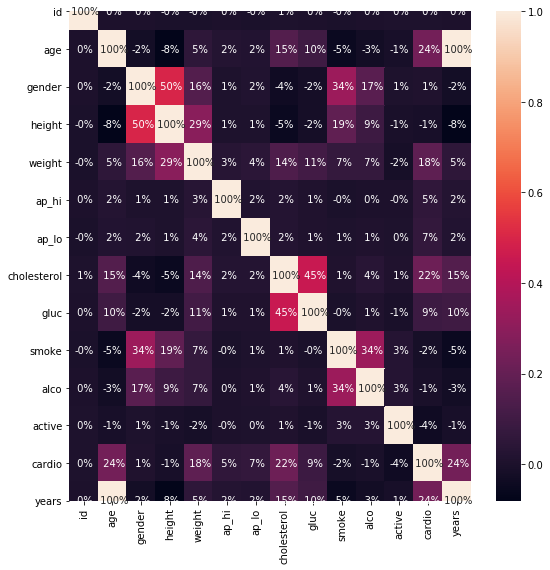

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True, fmt=' .0%')

### Data Pre-processing 

#### In this section, we will prepare our data for the machine learning model. As 'Years' and 'Id' colomns doesn't put any additional value to our dataset we will to remove this 

In [ ]:
# Remove or Drop the 'Years' colomn
df=df.drop('years',axis=1)

In [17]:
# Remove or Drop the 'ID' colomn
df=df.drop('id',axis=1)

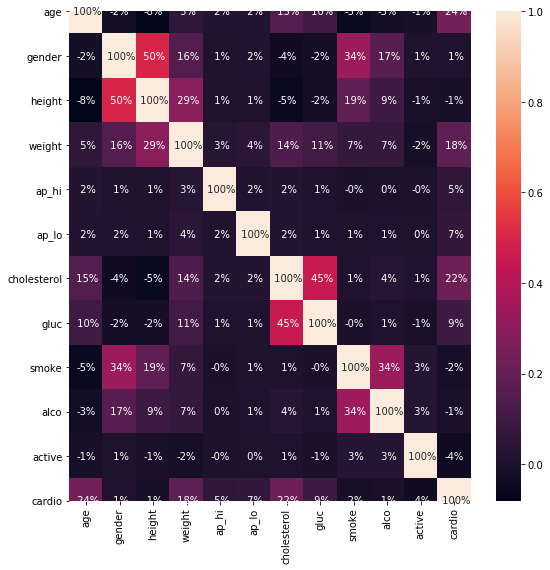

In [21]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True, fmt=' .0%')

#### Spliting the data into feature data and target data

In [18]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

#### Spliting the data, into 75% training data and 25% testing data set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.25, random_state = 1)

### Feature Scaling 

##### Scaling the values in the data to be values between 0 and 1 inclusive 

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_train)

### Now here we will be using a machine learning algorithm (Random Forest Classifier)

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=1)
forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

### Test the models accuracy on the training data set

In [28]:
model = forest
model.score(X_train, Y_train)

0.9791428571428571